In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


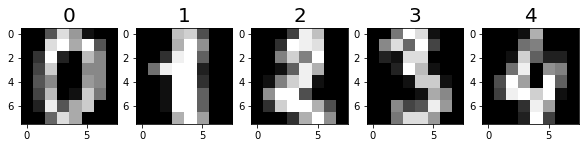

In [ ]:
plt.figure(figsize=(10,4))
for index, (image, label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
  plt.subplot(1,5,index+1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title('%i' % label, fontsize = 20)

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)
logisticReg = LogisticRegression()

logisticReg.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [3]:
logisticReg.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [4]:
predictions = logisticReg.predict(x_test)
score = logisticReg.score(x_test, y_test)
print(score)

0.9666666666666667


In [5]:
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(y_test, predictions)
print(conf_matrix)

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 37  0  0  0  3]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  1  0  0 38  0  0]
 [ 0  2  1  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  1  0  0  0 40]]


Text(0.5, 1, 'Accuracy score: 0.9666666666666667')

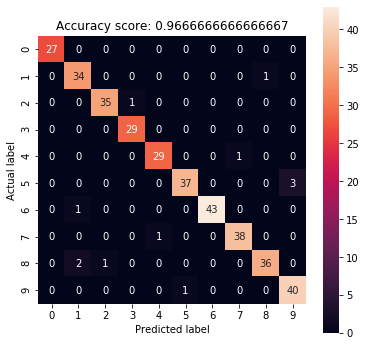

In [ ]:
import seaborn as sns
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy score: {0}'.format(score, size = 10))

In [ ]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
clf = LogisticRegression(C = 50. / 56000, solver='lbfgs', tol=0.1)

In [ ]:
import time
t0 = time.time()
clf.fit(x_train, y_train)
run_time = time.time() - t0
print(run_time)

31.141607761383057


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
score = clf.score(x_test, y_test)
print("Test score = %.4f" % score)

Test score = 0.9124


Text(0.5, 0.98, 'Classification vector for...')

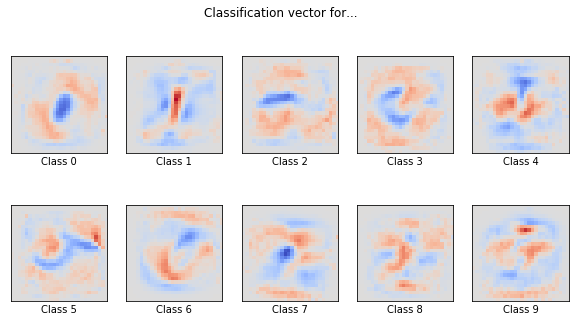

In [ ]:
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.coolwarm, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

In [ ]:
clf = LogisticRegression(C = 50. / 56000, penalty='l1', solver='saga', tol=0.1)
t0 = time.time()
clf.fit(x_train, y_train)
run_time = time.time() - t0

In [ ]:
print(run_time)

19.09871530532837


Text(0.5, 0.98, 'Visualization of w for')

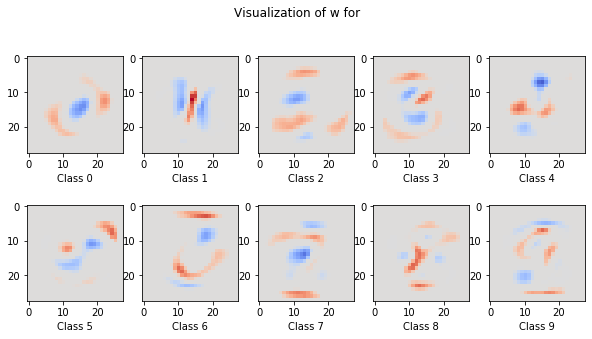

In [ ]:
coef = clf.coef_.copy()
plt.figure(figsize=(10,5))
scale = np.abs(coef).max()
for i in range(10):
  l1_plot = plt.subplot(2,5,i+1)
  l1_plot.imshow(coef[i].reshape(28,28), interpolation='nearest',cmap=plt.cm.coolwarm, vmin=-scale, vmax=scale)
  l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Visualization of w for')

In [ ]:
score = clf.score(x_test, y_test)
print("Test score = %.4f" % score)

Test score = 0.8314
